# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organizing Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

## Challenge

In this challenge, you need to implement a SOM such that it can categorise a set of random 3-dimensional colours.  The output should be an image of the organised data.  

### Expectations
- You are expected to detail your decisions & thinking in comments
- You may use any language you like (although the examples given below are using Python)
- Avoid using too many libraries that would do too much of the work for you. For example, in Python a good approach would be to use only functions from `numpy` (together with in-built libs if needed)
- Try and make your code as efficient as possible. Feel free to deviate from a literal interpretation of the instructions given under the **Training** heading above in the interest of code efficiency
- Consider the best way to structure your code for later use by other developers or in anticipation of productionisation
- Include any tests you may have used (tests not required however)
- You can use code below to generate the trainig data of 10 colours:

In [1]:
# Generate Data
import math
import numpy as np


def generate_training_data(num_instances, channels=3):
    """To generate randomized training data.
    The generated data is a numpy matrix which contains random values.

    Parameters
    ----------
    num_instances : int, default=None
        The number of training instances to be generated in the data
    channels: int, default=3
        The size of each input vector in the training data. It has been named as channels as the current 
        training data represent the number of color channels (RGB).

    Returns
    -------
    input_data: numpy.array, shape (num_instances,channels)
        Returns a numpy matrix consisting of randomly initialized values

    """
    input_data = np.random.random((num_instances, channels))
    return input_data

### 1. Implement a Kohonen network
- Use the above description to implement a Kohonen network
- Make sure you can configure the size of the input vector and the size of the map
- Make sure node's weights are initialized to random values

In [2]:
class SOM:
    """A class for Kohonen Self Organizing Map.

     Parameters
     ----------
     max_iterations : int, default=None
        The maximum number of iterations (where iterations indicate the number of passes over the whole 
        training data) for which the algorithm should run.
     grid_dimensions : {'rows': r,'columns':c}, default=None
        Height (rows) and width (columns) of the grid. Provided as a dictionary where the keys are 
        string and the values are int e.g. {'rows':10,'columns':10}
     initial_learning_rate : int, default=0.1
        Value of the learning rate at the first iteration.
     channels : int, default=3
        The size of the input vector which will be equivalent to the size of weight vector of each 
        node in the grid


     Examples
     --------
     >>> grid_dimensions = {"rows":10,"columns":10}
     >>> som = SOM(max_iterations=100, grid_dimensions=grid_dimensions, initial_learning_rate=0.01, 
     channels=3)
     >>> som.fit(input_data)

    """

    def __init__(
            self,
            max_iterations,
            grid_dimensions,
            initial_learning_rate=0.1,
            channels=3):

        # using a constructor to receive the parameters to initialize the class
        # attributes.
        np.random.seed(100)
        self.max_iterations = max_iterations
        self.grid_dimensions = grid_dimensions
        self.initial_learning_rate = initial_learning_rate
        # the following paramters are derived based on the previous class attributes.
        # as these will remain fixed throughout one instance of a SOM, thus initializing them here.
        # these are initialized using the formulae provided in the description
        # of the problem.
        self.initial_radius = max(
            self.grid_dimensions["rows"],
            self.grid_dimensions["columns"]) / 2
        # time_constant is equivalent to the lambda parameter indicated in the
        # description.
        self.time_constant = self.max_iterations / \
            math.log(self.initial_radius)
        self.som = np.random.random(
            (self.grid_dimensions["rows"],
             self.grid_dimensions["columns"],
             channels))

    def find_nodes_input_distances(
            self,
            som,
            current_input_vector,
            grid_dimensions):
        """Creates a matrix of Euclidean Distance values between each node of the grid and the 
        input vector. This distance matrix can then be used as a basis to find Best Matching Unit.

        Parameters
        ----------
        som : numpy.ndarray, shape (grid_rows, grid_columns,channels), default=None
            The randomly initialized (for first iteration or updated for subsequent iterations) 
            SOM grid.
        current_input_vector : numpy.ndarray, shape (channels,), default=None
            The input vector in the current iteration of training
        grid_dimensions : {'rows': r,'columns':c}, default=None
            Height (rows) and width (columns) of the grid. Provided as a dictionary where the 
            keys are string and the values are int e.g. {'rows':10,'columns':10}

        Returns
        -------
        dist_matrix: numpy.ndarray, shape (grid_rows,grid_columns)
            A matrix where each element represents Euclidean Distance of node in the grid with 
            the input vector.
        """

        # firstly initializing a numpy matrix of all zeros as a placeholder to store 
        #the updated values. Another option is to reshape the output of the calculations performed 
        #instead of initializing the matrix as done here.
        # this matrix is meant to store the values of the calculated euclidean distance between 
        #each node's weight vector and the current input vector. For this reason, the dimension of 
        #this matrix is equal to the size of the grid so that each node's value can be stored.
        dist_matrix = np.zeros(
            (grid_dimensions["rows"],
             grid_dimensions["columns"]))

        # calculating the Euclidean distance by using numpy's native functions. firstly, the 
        #randomly initialized SOM (for first iteration, its going to be random and for subsequent 
        #iteration, it's going to be the updated ones) is subtracted from the current input vector. 
        #Even though the dimensions are different, numpy's broadcasting feature helps to perform 
        #the subtraction. Each weight vector's coordinates are subtracted from the corresponding
        # coordinate of the input vector. Then each subtracted coordinates are squared and then 
        #summed for each vector. lastly, square root is taken which results in a scalar value which 
        #is stored in the dist_matrix placeholder and returned.
        dist_matrix = np.sqrt(
            np.sum(
                (som - current_input_vector) ** 2,
                axis=2))
        return dist_matrix

    def find_bmu_index(self, dist_matrix):
        """Returns matrix index of the Best Matching Unit (BMU) node in a grid.
        It finds by determining the index of the minimum value in a matrix.

        Parameters
        ----------
        dist_matrix : numpy.ndarray, shape (grid_rows, grid_columns), default=None
            A matrix where each element represents Euclidean Distance value (scalar) of node 
            in the grid with the input vector.

        Returns
        -------
        numpy.array, shape (2,)
            A matrix representing the index of BMU in a grid.
        """

        # the distance matrix (calculated by invoking find_nodes_input_distances function) is 
        # then used to find the location/index of BMU. As BMU is the one that closely resembles 
        # current input vector so from the perspective of a matrix of euclidean distances between 
        # each node and current input vector, it should exist at the index where the value is minimum. 
        # The index is determined by using np.where function that returns index where the minimum value 
        #exists in the distance matrix (determined via np.amin)
        bmu_index = np.where(dist_matrix == np.amin(dist_matrix))

        # the returned object is then refactored to return a numpy array of shape (2,) which indicates 
        # location/index of the BMU e.g. array([2, 7], dtype=int64)
        return np.array([bmu_index[0][0], bmu_index[1][0]])

    def find_each_node_influence(
            self,
            som,
            bmu_index,
            radius_current_iteration,
            grid_dimensions):
        """Calculates the influence of training at a given iteration.


        Parameters
        ----------
        som: numpy.ndarray, shape (grid_rows, grid_columns,channels), default=None
            The randomly initialized SOM grid.

        bmu_index: numpy.array, shape (2,), default=None
            Index of BMU in a SOM grid

        radius_current_iteration: int, default=None
            Radius of BMU's neighborhood in the current iteration

        grid_dimensions: {'rows': r,'columns':c}, default=None
            Height (rows) and width (columns) of the grid. Provided as a dictionary where 
            the keys are string and the values are
            int e.g. {'rows':10,'columns':10}


        Returns
        -------
        influence_matrix: numpy.ndarray, shape (grid_rows,grid_columns)
            A matrix consisting of scalar values representing how much a node in the neighborhood 
            of BMU should be influenced
            while updating the weights
        """
        # firstly initializing a matrix of all zero elements as a placeholder. This matrix will 
        # be used to store the euclidean distance between position of BMU and each node so it's
        # dimensions are equal to the size of grid.
        influence_dist_matrix = np.zeros(
            (grid_dimensions["rows"], grid_dimensions["columns"]))

        # a matrix is being created in which each element is a vector of shape (2,). Each element
        # represents it's location or index in the matrix e.g. it looks like this:
        # [ [0,0] [0,1]     ...        [0,nColumns] ]
        #   ...
        # [ [nRows,0] [nRows,1] ... [nRows,nColumns]]
        #
        # This matrix will be used in the subsequent calculations to find Euclidean distance 
        # between each index of node to BMU.
        matrix_of_indices = np.array([np.array(x) for x, y in np.ndenumerate(
            influence_dist_matrix)]).reshape(grid_dimensions["rows"], grid_dimensions["columns"], 2)

        # calculating the euclidean distance between BMU's index and every
        # other element's position in the grid.
        influence_dist_matrix = np.sqrt(
            np.sum((matrix_of_indices - bmu_index) ** 2, axis=2))

        # the previously calculated matrix is then used to find influence value for each weight. 
        # This matrix is equal to the size of grid and each scalar value represents the influence 
        # by which it's weight will be updated in the later phases of the training. 
        # The formulae provided in the description is being used to calculate the influence.
        influence_matrix = np.exp(-((influence_dist_matrix**2) /
                                    (2 * radius_current_iteration**2)))

        return influence_matrix

    def update_weights(
            self,
            som,
            influence_matrix,
            current_input_vector,
            lr_current_iteration,
            grid_dimensions):
        """ Updates current weight vector of each node in the grid.

        Parameters
        ----------
        som: numpy.ndarray, shape (grid_rows, grid_columns,channels), default=None
            The randomly initialized SOM grid.
        influence_matrix: numpy.ndarray, shape (grid_rows,grid_columns)
            A matrix representing scalar value of how much a node in the neighborhood of BMU 
            should be influenced while updating the weights
        current_input_vector: numpy.ndarray, shape (1,channels), default=None
            The input vector in the current iteration of the training
        lr_current_iteration: int, default=None
            Scalar value of learning rate in the current iteration

        grid_dimensions: {'rows': r,'columns':c}, default=None
            Height (rows) and width (columns) of the grid. Provided as a dictionary where the 
            keys are string and the values are int e.g. {'rows':10,'columns':10}


        Returns
        -------
        updated_som: numpy.ndarray, shape (grid_rows,grid_columns,channels)
            A matrix representing the updated weight vectors to be used in the next iteration 
            of training
        """
        # the provided influence matrix, calculate as output of find_each_node_influence 
        # function is reshaped to be used in the subsequent calculations of weight.
        reshaped_influence_matrix = influence_matrix.reshape(
            grid_dimensions["rows"], grid_dimensions["columns"], 1)

        # updated values of weights are being calculated as per the provided
        # formula in the problem's description.
        updated_som = som + lr_current_iteration * \
            reshaped_influence_matrix * (current_input_vector - som)

        return updated_som

    def fit(self, input_data):
        """ Trains a self organizing map against the provided input data


        Parameters
        ----------
        input_data: numpy.ndarray, shape (N, channels), default=None
            The training data against which SOM should be trained

        Returns
        -------
        som: numpy.ndarray, shape (grid_rows,grid_columns,channels)
            A matrix representing the updated weight vectors to be used in the 
            next iteration of training
        """

        for current_iteration in range(self.max_iterations):
            # a loop to iterate through each iteration of the training phase.

            # to generate output to indicate progress of training, the following code 
            # will show the value of the current iteration after 10 iterations to reduce verbosity.
            if (current_iteration % 10 == 0):
                print("current iteration: {}".format(current_iteration))

            # The parameters that are calculate on per iteration basis are calculated here 
            # as per the description of the problem. for instance calculating radius of the current
            # iteration:
            radius_current_iteration = self.initial_radius * \
                math.exp(-(current_iteration / self.time_constant))

            # and to calculating learning rate of the current iteration:
            lr_current_iteration = self.initial_learning_rate * \
                math.exp(-(current_iteration / self.time_constant))

            for current_input_vector in input_data:
                # iterating through each training instance in the provided
                # training data.

                # firstly calculating distance between each node and the input
                # vector:
                distance_matrix = self.find_nodes_input_distances(
                    self.som, current_input_vector, self.grid_dimensions)

                # using the distance matrix of each node to the inpute vector,
                # determine the Best Matching Unit (BMU)
                bmu_index = self.find_bmu_index(distance_matrix)

                # finding influence value of each node in the grid:
                influence_matrix = self.find_each_node_influence(
                    self.som, bmu_index, radius_current_iteration, self.grid_dimensions)

                # performing updates on the weight to be used in the next
                # iterations.
                self.som = self.update_weights(
                    self.som,
                    influence_matrix,
                    current_input_vector,
                    lr_current_iteration,
                    self.grid_dimensions)

        # returning the updated value of the SOM (i.e. weight vectors of each
        # node in the grid)
        return self.som


### 2. Train a 10x10 network over 100 iterations

- Training data is a random set of 20 colours
- How long does this take?
- What does the map look like? (You will need to translate the weights of each node in the map to pixel data)
- What does this look like if you perform 200 & 500 iterations?

You should end up with something that looks like below after 500 iterations:

In [3]:
# generating training of data of 20 colors:
import time
input_data = generate_training_data(20, 3)

# training a 10x10 network over 100,200 and 500 iterations:
iterations_trial = [100, 200, 500]
iteration_results = {}
grid_dimensions = {"rows": 10, "columns": 10}

for each_iteration in iterations_trial:
    print("Running for {} iterations:".format(each_iteration))
    som = SOM(
        max_iterations=each_iteration,
        grid_dimensions=grid_dimensions,
        initial_learning_rate=0.01,
        channels=3)
    start_time = time.time()
    som.fit(input_data)
    end_time = time.time()
    iteration_results[each_iteration] = {
        "som": som.som, "elapsed_time": end_time - start_time}


Running for 100 iterations:
current iteration: 0
current iteration: 10
current iteration: 20
current iteration: 30
current iteration: 40
current iteration: 50
current iteration: 60
current iteration: 70
current iteration: 80
current iteration: 90
Running for 200 iterations:
current iteration: 0
current iteration: 10
current iteration: 20
current iteration: 30
current iteration: 40
current iteration: 50
current iteration: 60
current iteration: 70
current iteration: 80
current iteration: 90
current iteration: 100
current iteration: 110
current iteration: 120
current iteration: 130
current iteration: 140
current iteration: 150
current iteration: 160
current iteration: 170
current iteration: 180
current iteration: 190
Running for 500 iterations:
current iteration: 0
current iteration: 10
current iteration: 20
current iteration: 30
current iteration: 40
current iteration: 50
current iteration: 60
current iteration: 70
current iteration: 80
current iteration: 90
current iteration: 100
curren

Here's how the map looks like after each iteration:

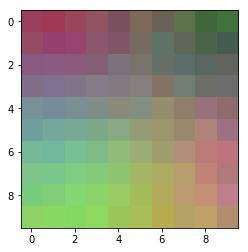

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
# after 100 iterations:

plt.imshow(iteration_results[100]["som"])

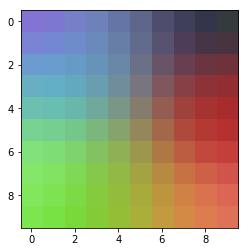

In [5]:
# after 200 iterations:
plt.imshow(iteration_results[200]["som"])

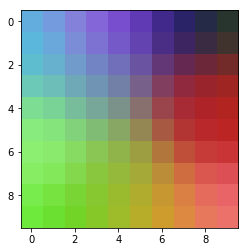

In [6]:
# after 500 iterations.
plt.imshow(iteration_results[500]["som"])

<BarContainer object of 3 artists>

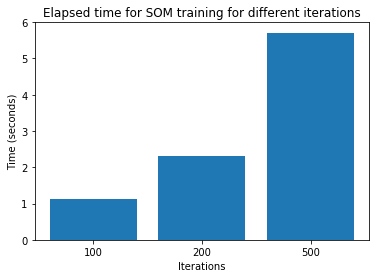

In [27]:
# and here's how the elapsed time of training looks like across different number of iterations:
plt.title('Elapsed time for SOM training for different iterations')
plt.ylabel('Time (seconds)')
plt.xlabel('Iterations')
plt.bar([0,1,2],[v["elapsed_time"] for k,v in iteration_results.items()],tick_label=iterations_trial)

### Some Conclusions:
* As the number of iterations are increased (particularly from 100 to 200), the map looks more and more uniform i.e. in this specific example, the colors of the same shade become better clustered together. Initially, the distribution of colors in the map may look dispersed but it
gradually becomes more and more coherent with the increasing number of iterations. This is an indication that SOM is converging during the training process. 
* Another interesting aspect is that as we proceed from 200 to 500 iterations, there is not much change in the map. The distribution of colors look more or less the same. This can be an indication that the SOM has converged to a greater degree after 200 and even upon running for iterations, it's not updating the weights. This is also substantiated from the fact that parameters like learning rate and radius will exponentiall decay over time (or over iterations). So for large number of iterations, the neighborhood will continue to shrink a lot thereby causing minimal to no change in the neighborhood of BMUs in each iteration.
* The training time is increasing almost linearly as the number of iterations are increased. This is based on the premise of how the algorithm has been specified i.e. the training consists of iterating through each training instance in each iteration. So the training time is bound to increase if we increase either training instances and/or number of iterations.

### 3. Train a 100x100 network over 1000 iterations

- This network will likely be significantly slower to train
- What could you do to improve performance?
- What does the network look like after 1000 iterations?

You should end up with something like below:

In [16]:
# Reusing the training data that was generated before.

# training a 10x10 network over 100,200 and 500 iterations:
iterations_trial = [1000]
iteration_results = {}
grid_dimensions = {"rows": 100, "columns": 100}

for each_iteration in iterations_trial:
    print("Running for {} iterations:".format(each_iteration))
    som = SOM(
        max_iterations=each_iteration,
        grid_dimensions=grid_dimensions,
        initial_learning_rate=0.01,
        channels=3)
    start_time = time.time()
    som.fit(input_data)
    end_time = time.time()
    iteration_results[each_iteration] = {
        "som": som.som, "elapsed_time": end_time - start_time}


Running for 1000 iterations:
current iteration: 0
current iteration: 10
current iteration: 20
current iteration: 30
current iteration: 40
current iteration: 50
current iteration: 60
current iteration: 70
current iteration: 80
current iteration: 90
current iteration: 100
current iteration: 110
current iteration: 120
current iteration: 130
current iteration: 140
current iteration: 150
current iteration: 160
current iteration: 170
current iteration: 180
current iteration: 190
current iteration: 200
current iteration: 210
current iteration: 220
current iteration: 230
current iteration: 240
current iteration: 250
current iteration: 260
current iteration: 270
current iteration: 280
current iteration: 290
current iteration: 300
current iteration: 310
current iteration: 320
current iteration: 330
current iteration: 340
current iteration: 350
current iteration: 360
current iteration: 370
current iteration: 380
current iteration: 390
current iteration: 400
current iteration: 410
current iteratio

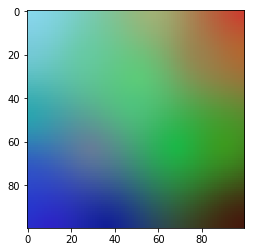

In [18]:
# 100x100 map after 1000 iterations:
plt.imshow(iteration_results[1000]["som"])

In [215]:
# elapsed training time:
print("Elapsed time for 1000 iterations training of 100x100 network: {} seconds".format(iteration_results[1000]["elapsed_time"]))

Elapsed time for 1000 iterations training of 100x100 network: 508.84865498542786 seconds


### Potential Performance Improvements:
* __Batch Updates:__ Currently, the updates to the weights of the grid's nodes are being performed for each training instance. There is an opportunity to perform the updates in batch fashion. This is based on the similar intuition of improving gradient descent algorithm by opting for batch or stochastic gradient descent variants for optimizations.
* __GPUs or distributed processing for execution:__ Even though vectorization is being performed currently by leveraging numpy's capabilities, I believe there is an opportunity to further enhance performance time by opting for execution on GPUs. GPUs will enable the capabilities to run processes/computations in parallel further and can potentially reduce time. On the same note, if the computations can be parallelized over set of machines, the performance is expected to further improve as well.
* __Early Stopping:__ There is a likelihood that map/grid may not require that many iterations to train. It can get trained before the process has reached the maximum iterations and in such instances, there is no value in continuing the training for further iterations. Similar to how Early Stopping is employed in training of Artificial Neural Networks (though the intent there is to avoid overfitting by using call-backs to a validation metric), similar mechanisms can be adopted here as well to see that if weights are not changing much in each iterations, the training should be stopped.
* __Alignment with the latest research:__ Going through the research papers relevant to self organizing maps, we can identify a number of ways via which we can improve performance. For instance, the following research papers highlight how the training process can be improved:
    * https://link.springer.com/article/10.1007/s11063-012-9245-x
    * https://www.researchgate.net/publication/220708732_Improving_Self-Organizing_Feature_Map_SOFM_Training_Algorithm_Using_K-Means_Initialization

In [28]:
# a few unit tests:
import unittest


class SOMSpec(unittest.TestCase):

    def test_find_bmu_index_shape(self):
        grid_dimensions = {"rows": 10, "columns": 10}
        test_som = SOM(
            max_iterations=10,
            grid_dimensions=grid_dimensions,
            initial_learning_rate=0.01,
            channels=3)
        expected_bmu_shape = (2,)
        retrieved_bmu_shape = test_som.find_bmu_index(
            np.random.random((10, 10))).shape
        self.assertEqual(expected_bmu_shape, retrieved_bmu_shape)

    def test_som_dimensions(self):
        grid_dimensions = {"rows": 10, "columns": 10}
        test_som = SOM(
            max_iterations=10,
            grid_dimensions=grid_dimensions,
            initial_learning_rate=0.01,
            channels=3)
        expected_som_shape = (10, 10, 3)
        retrieved_som_shape = test_som.som.shape
        self.assertEqual(expected_som_shape, retrieved_som_shape)

    def test_som_type(self):
        grid_dimensions = {"rows": 10, "columns": 10}
        test_som = SOM(
            max_iterations=10,
            grid_dimensions=grid_dimensions,
            initial_learning_rate=0.01,
            channels=3)
        self.assertIsInstance(test_som.initial_radius, float)

    def test_update_som(self):
        grid_dimensions = {"rows": 10, "columns": 10}
        test_som = SOM(
            max_iterations=10,
            grid_dimensions=grid_dimensions,
            initial_learning_rate=0.01,
            channels=3)
        sample_influence_matrix = np.random.random(
            (grid_dimensions["rows"], grid_dimensions["columns"]))
        sample_lr_current_iteration = 0.8

        sample_current_input_vector = np.random.random((3,))
        expected_updated_som_shape = test_som.som.shape
        retrieved_updated_som_shape = (
            test_som.update_weights(
                test_som.som,
                sample_influence_matrix,
                sample_current_input_vector,
                sample_lr_current_iteration,
                grid_dimensions)).shape
        self.assertEqual(
            expected_updated_som_shape,
            retrieved_updated_som_shape)


unittest.main(argv=[''], verbosity=2, exit=False)


test_find_bmu_index_shape (__main__.SOMSpec) ... ok
test_som_dimensions (__main__.SOMSpec) ... ok
test_som_type (__main__.SOMSpec) ... ok
test_update_som (__main__.SOMSpec) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.008s

OK
